In [1]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 14})
plt.rcParams.update({"axes.axisbelow": True})

import matplotlib.ticker as mtick

In [2]:
import pandas as pd

In [3]:
domain_df = pd.read_parquet(
    "../../data/intermediate/cleaned_arena_data/domains_enriched.parquet"
)
citations_df = pd.read_parquet(
    "../../data/intermediate/cleaned_arena_data/citations_enriched.parquet"
)

In [4]:
citations_df.domain_classification.value_counts(normalize=True).sort_values(
    ascending=True
)

domain_classification
community_blog    0.013390
search_engine     0.014169
academic          0.017007
tech              0.032208
other             0.034475
gov_edu           0.042424
wiki              0.047890
news              0.089774
social_media      0.100107
unclassified      0.608555
Name: proportion, dtype: float64

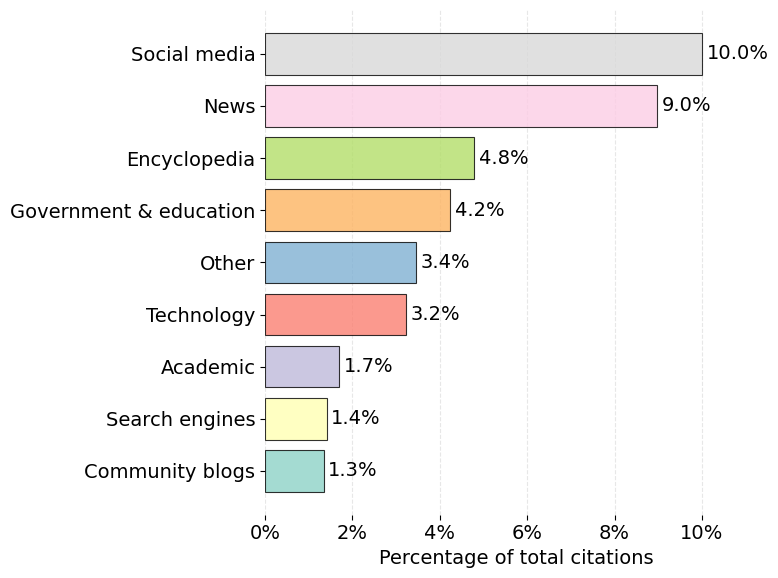

In [5]:
# Create mapping from technical names to meaningful labels
classification_mapping = {
    "social_media": "Social media",
    "news": "News",
    "wiki": "Encyclopedia",
    "gov_edu": "Government & education",
    "other": "Other",
    "tech": "Technology",
    "academic": "Academic",
    "search_engine": "Search engines",
    "community_blog": "Community blogs",
}

# Get classification percentages excluding unclassified
classification_counts = (
    citations_df["domain_classification"]
    .value_counts(normalize=True)
    .sort_values(ascending=True)
)

# Exclude unclassified category
classified_only = classification_counts[classification_counts.index != "unclassified"]

# Map to meaningful names
classified_renamed = classified_only.copy()
classified_renamed.index = [
    classification_mapping.get(name, name) for name in classified_renamed.index
]

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create the horizontal bar plot with a more sophisticated color scheme
colors = plt.cm.Set3(range(len(classified_renamed)))
bars = ax.barh(
    range(len(classified_renamed)),
    classified_renamed.values,
    color=colors,
    alpha=0.8,
    edgecolor="black",
    linewidth=0.8,
)

plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
# Customize the plot
ax.set_xlabel("Percentage of total citations")

# Set y-axis labels
ax.set_yticks(range(len(classified_renamed)))
ax.set_yticklabels(classified_renamed.index)

# Add percentage labels at the end of bars
for i, (bar, value) in enumerate(zip(bars, classified_renamed.values)):
    ax.text(
        bar.get_width() + 0.001,
        bar.get_y() + bar.get_height() / 2,
        f"{value * 100:.1f}%",
        ha="left",
        va="center",
    )

# Add grid for better readability
ax.grid(True, axis="x", alpha=0.3, linestyle="--")
ax.set_axisbelow(True)

# Set x-axis to start from 0 and add some padding at the right
ax.set_xlim(0, max(classified_renamed.values) * 1.15)

# Improve overall appearance
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the figure for the paper
plt.savefig(
    "../../data/output/cleaned_arena_data/citation_classification_distribution.pdf"
)